# TASK-5 : Building a Classification Model

### Data Acquisition

In [1]:
# import modules
import os 
import pandas as pd # for dataframes
import numpy as np
import matplotlib.pyplot as plt # for plotting a graph
import seaborn as sns # for plotting a graph

In [2]:
# Open database
df = pd.read_excel("Student Applications & Performance.xlsx", sheet_name = 'University information', engine='openpyxl')
df

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,7948112,18,F,BGD 4,N,N,Music Performance,N,NaN,800.0,...,B,Bachelors,18,18,16.0,13.0,0,0,0,0.0
3396,8023055,18,F,BGD 1,Y,N,Biology,N,20.0,NaN,...,B,Bachelors,13,9,NaN,NaN,0,0,0,0.0
3397,7926915,18,F,BGD 4,Y,N,Biology,N,NaN,1020.0,...,B,Bachelors,14,6,NaN,NaN,0,945840,1288980,0.0
3398,7877332,18,F,BGD 3,Y,N,Joint Enrollment - Accel,N,21.0,NaN,...,B,Bachelors,12,9,NaN,NaN,0,269100,0,-231720.0


### Exploratory Data Analysis

In [3]:
# Check working directory before open the data sheet.
print("Current Working directory")
print(os.getcwd())

Current Working directory
C:\Student_Attrition


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [5]:
# check the missing values if any
df.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [6]:
# Shape of categorical, Numerical features
print('Categorical columns', df.loc[:, df.dtypes== np.object].shape)
print('Float64 columns', df.loc[:, df.dtypes == np.float64].shape)
print('Int64 columns', df.loc[:, df.dtypes == np.int64].shape)

Categorical columns (3400, 36)
Float64 columns (3400, 10)
Int64 columns (3400, 10)


C:\Users\91951\AppData\Local\Temp/ipykernel_4240/2281055892.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print('Categorical columns', df.loc[:, df.dtypes== np.object].shape)


In [7]:
# to get the Basic Statistical analysis on Data
df.describe()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


<AxesSubplot:>

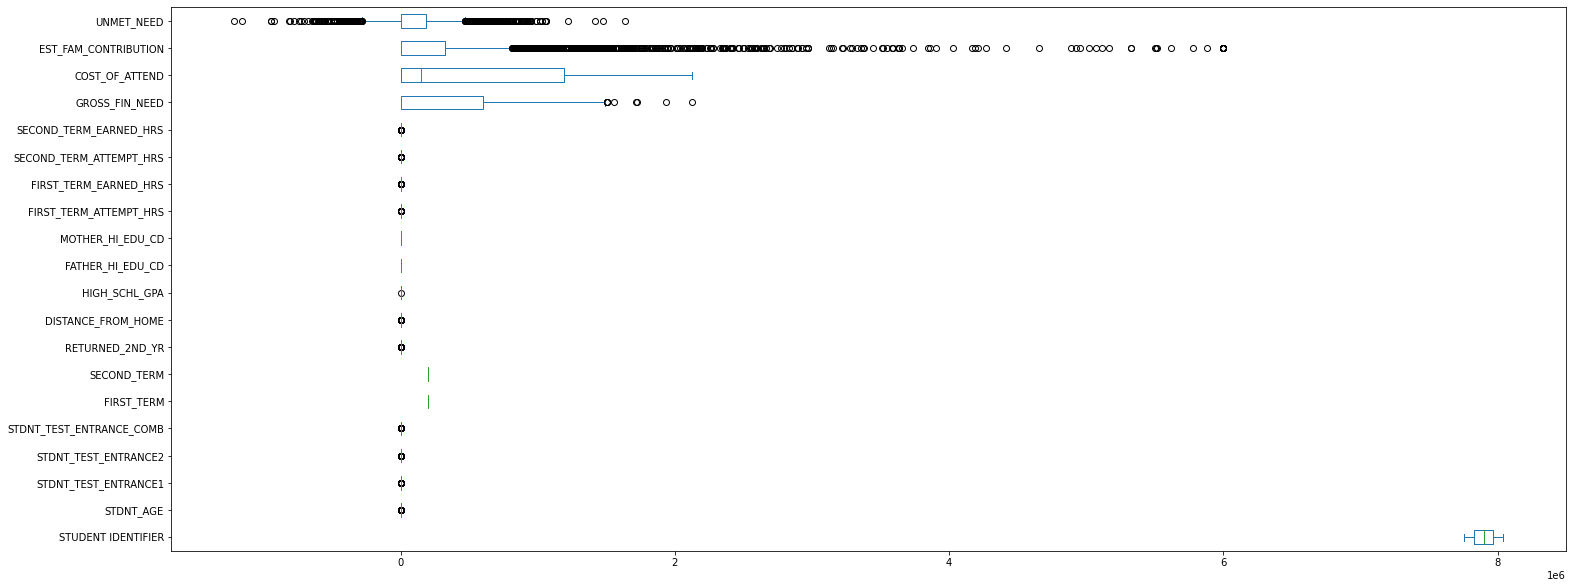

In [8]:
#Plotting 'Box Plot' to find outliers
df.plot(kind='box',vert=False, figsize=(25,10))

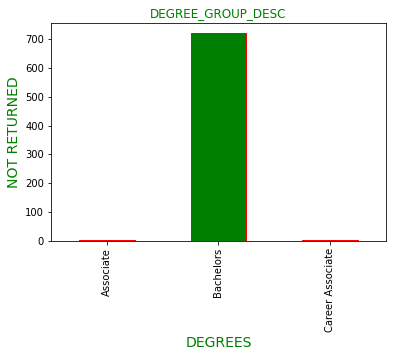

In [9]:
# plotting Degree against NoN returned Students
df1 = df[df['RETURNED_2ND_YR']==0]
plt.clf()
# Only Bachelor degree taken more drop out
df1.groupby('DEGREE_GROUP_DESC')['RETURNED_2ND_YR'].count().plot(kind='bar', color='g', edgecolor='r')
plt.xlabel('DEGREES', color='g', fontsize=14)
plt.ylabel('NOT RETURNED', color='g', fontsize=14)
plt.title('DEGREE_GROUP_DESC', color='g')
plt.show()

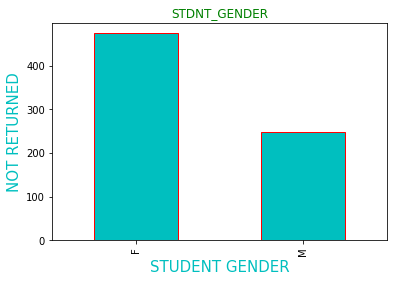

In [10]:
# More Female student go drop out
plt.clf()
df1.groupby('STDNT_GENDER')['RETURNED_2ND_YR'].count().plot(kind='bar', color='c', edgecolor='r')
plt.xlabel('STUDENT GENDER', color='c', fontsize=15)
plt.ylabel('NOT RETURNED', color='c', fontsize=15)   #WKYC
plt.title('STDNT_GENDER', color='g')
plt.show()

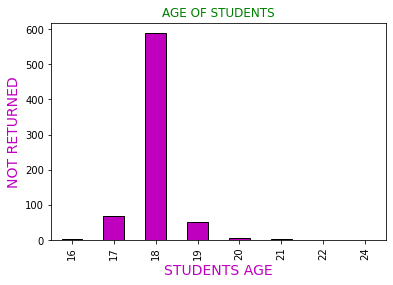

In [11]:
# Below age 18 group caused the student attrition
plt.clf()
df1.groupby('STDNT_AGE')['RETURNED_2ND_YR'].count().plot(kind='bar', color='m', edgecolor='k')
plt.xlabel('STUDENTS AGE', color='m', fontsize=14)
plt.ylabel('NOT RETURNED', color='m', fontsize=14)
plt.title('AGE OF STUDENTS', color='g')
plt.show()

In [12]:
# code for finding the percentage of missing values
null = pd.DataFrame(round(df.isnull().sum()/df.shape[0]*100, 2).sort_values(ascending=False)).reset_index()
null

,index,0
0,CORE_COURSE_GRADE_6_S,97.62
1,CORE_COURSE_NAME_6_S,97.62
2,CORE_COURSE_NAME_6_F,96.24
3,CORE_COURSE_GRADE_6_F,96.24
4,CORE_COURSE_GRADE_5_S,86.76
5,CORE_COURSE_NAME_5_S,86.76
6,CORE_COURSE_GRADE_5_F,81.03
7,CORE_COURSE_NAME_5_F,81.03
8,STDNT_TEST_ENTRANCE1,67.47
9,CORE_COURSE_NAME_4_S,60.15


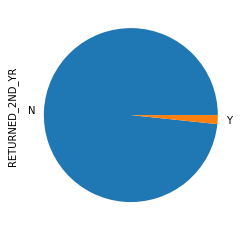

In [13]:
# There is only few international student are droped out here
plt.clf()
df1.groupby('INTERNATIONAL_STS')['RETURNED_2ND_YR'].count().plot(kind='pie')
plt.show()

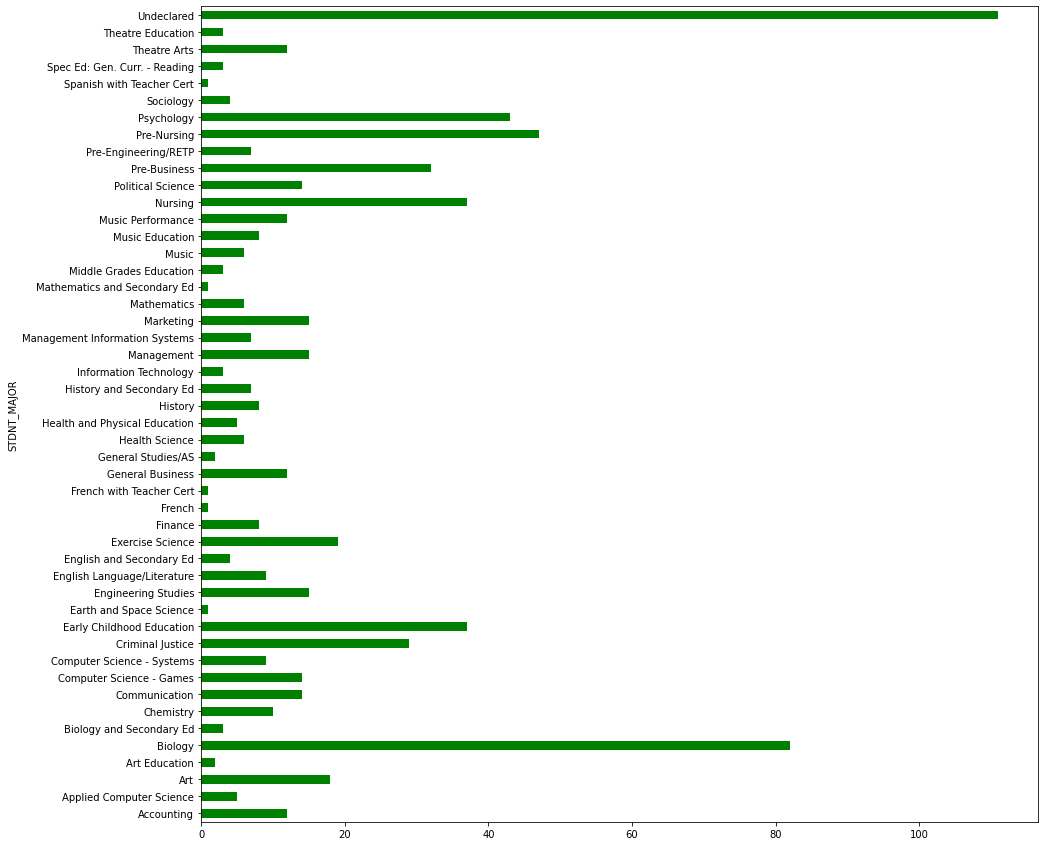

In [14]:
# Biology, Pre Nursing and Psychology background got more attrition
plt.clf()
df1.groupby('STDNT_MAJOR')['RETURNED_2ND_YR'].count().plot(kind='barh', figsize=(15, 15), color='g')
plt.show()

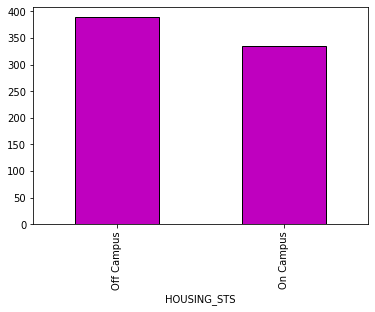

In [15]:
# The day scolar student are having most dropped out
plt.clf()
df1.groupby('HOUSING_STS')['RETURNED_2ND_YR'].count().plot(kind='bar', color='m', edgecolor='k')
plt.show()

<AxesSubplot:ylabel='Frequency'>

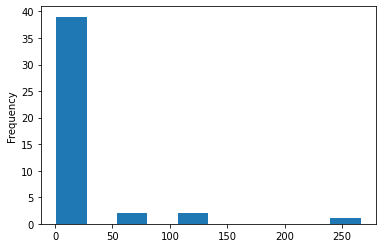

In [16]:
# More Distance from home is not causing got more student attrition
plt.clf()
df1.groupby('DISTANCE_FROM_HOME')['RETURNED_2ND_YR'].count().plot(kind='hist')

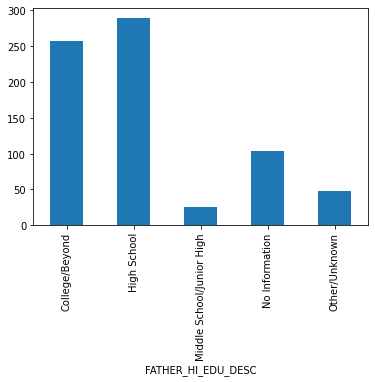

In [17]:
# Father's Education is more than High School is causing more Student Attrition
plt.clf()
df1.groupby('FATHER_HI_EDU_DESC')['RETURNED_2ND_YR'].count().plot(kind='bar')
plt.show()

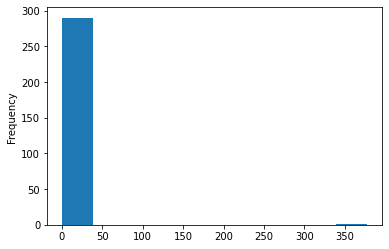

In [18]:
plt.clf()
df1.groupby('UNMET_NEED')['RETURNED_2ND_YR'].count().plot(kind='hist')
plt.show()

In [19]:
# list top 15 highnull value columns
highnull = pd.DataFrame(round((df.isnull().sum()/df.shape[0]*100)).nlargest(16)).reset_index()['index'].sort_values(ascending=False)
highnull

15     STDNT_TEST_ENTRANCE2
8      STDNT_TEST_ENTRANCE1
0      CORE_COURSE_NAME_6_S
2      CORE_COURSE_NAME_6_F
4      CORE_COURSE_NAME_5_S
6      CORE_COURSE_NAME_5_F
9      CORE_COURSE_NAME_4_S
11     CORE_COURSE_NAME_4_F
13     CORE_COURSE_NAME_3_S
1     CORE_COURSE_GRADE_6_S
3     CORE_COURSE_GRADE_6_F
5     CORE_COURSE_GRADE_5_S
7     CORE_COURSE_GRADE_5_F
10    CORE_COURSE_GRADE_4_S
12    CORE_COURSE_GRADE_4_F
14    CORE_COURSE_GRADE_3_S
Name: index, dtype: object

In [20]:
df01 = df.copy()
# Dropping top 15 high null columns
df01.drop(columns=highnull.tolist(), axis=1, inplace=True)
# Dropping the columns which not required
df01.drop(columns=['STUDENT IDENTIFIER', 'FATHER_HI_EDU_DESC', 'FIRST_TERM', 'SECOND_TERM'], axis=1, inplace=True)

In [21]:
# Replacing null value in FATHER_HI_EDU_CD
df01['FATHER_HI_EDU_CD'] = df01['FATHER_HI_EDU_CD'].fillna(df01['FATHER_HI_EDU_CD'].value_counts().keys()[0]) 

In [22]:
# Replacing null value in MOTHER_HI_EDU_CD
df01['MOTHER_HI_EDU_CD'] = df01['MOTHER_HI_EDU_CD'].fillna(df01['MOTHER_HI_EDU_CD'].value_counts().keys()[0])

In [23]:
# Replacing null value with mean
df01['SECOND_TERM_ATTEMPT_HRS'] = df01['SECOND_TERM_ATTEMPT_HRS'].fillna(df01['SECOND_TERM_ATTEMPT_HRS'].mean())
df01['SECOND_TERM_EARNED_HRS'] = df01['SECOND_TERM_EARNED_HRS'].fillna(df01['SECOND_TERM_EARNED_HRS'].mean())
df01['STDNT_TEST_ENTRANCE_COMB'].fillna(df01['STDNT_TEST_ENTRANCE_COMB'].mean(), inplace = True)
df01['DISTANCE_FROM_HOME'].fillna(df01['DISTANCE_FROM_HOME'].mean(), inplace=True)
df01['HIGH_SCHL_GPA'].fillna(df01['HIGH_SCHL_GPA'].mean(), inplace = True)
df01['HIGH_SCHL_NAME'].fillna(df01['HIGH_SCHL_NAME'].value_counts().keys()[0], inplace=True)

In [24]:
# Replacing the value with mode as categorical value
df01['CORE_COURSE_NAME_2_F'].fillna('ENGL_1101', inplace=True)
df01['CORE_COURSE_GRADE_2_F'].fillna('B', inplace=True)
df01['CORE_COURSE_NAME_3_F'].fillna('ENGL_1101', inplace=True)
df01['CORE_COURSE_GRADE_3_F'].fillna('B', inplace=True)
df01['CORE_COURSE_NAME_1_S'].fillna('ENGL_1102', inplace=True)
df01['CORE_COURSE_GRADE_1_S'].fillna('C', inplace=True)
df01['CORE_COURSE_NAME_2_S'].fillna('ENGL_1102', inplace=True)
df01['CORE_COURSE_GRADE_2_S'].fillna('B', inplace=True)

In [25]:
# Replacing Incomplete with Not Repeating for CORE_COURSE_GRADE_1_F
df01['CORE_COURSE_GRADE_1_F'].replace('INCOMPL', 'NOT REP', inplace=True)

In [26]:
# Replacing Incompl with Not Rep for CORE_COURSE_GRADE_2_F AND 1_S
df01['CORE_COURSE_GRADE_2_F'].replace('INCOMPL', 'NOT REP', inplace=True)
df01['CORE_COURSE_GRADE_1_S'].replace('INCOMPL', 'NOT REP', inplace=True)


In [27]:
# Encoding the variables
# for unmet needs shall replace the positive numbers as 1, negative numbers as 2 and for other numbers as o
df01['UNMET_NEED'][df01['UNMET_NEED']>0] = 1
df01['UNMET_NEED'][df01['UNMET_NEED']<0] = 2
df01['UNMET_NEED'][df01['UNMET_NEED']==0] = 0

C:\Users\91951\AppData\Local\Temp/ipykernel_4240/1631862308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df01['UNMET_NEED'][df01['UNMET_NEED']>0] = 1
C:\Users\91951\AppData\Local\Temp/ipykernel_4240/1631862308.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df01['UNMET_NEED'][df01['UNMET_NEED']<0] = 2
C:\Users\91951\AppData\Local\Temp/ipykernel_4240/1631862308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df01['UNMET_N

In [28]:
# Replacing  the School names
df01['HIGH_SCHL_NAME'] = df01['HIGH_SCHL_NAME'].str.replace('SCHOOL', '')
df01['HIGH_SCHL_NAME'] = df01['HIGH_SCHL_NAME'].astype('int64')

In [29]:
# Replacing the bacground
df01['STDNT_BACKGROUND'] = df01['STDNT_BACKGROUND'].str.replace('BGD', '')
df01['STDNT_BACKGROUND'] = df01['STDNT_BACKGROUND'].astype('int64')
df01['FATHER_HI_EDU_CD'] = df01['FATHER_HI_EDU_CD'].astype('int64')

In [30]:
# For model building purpose we are rreplacing 1 as attriting and 0 as not attriting
df01['RETURNED_2ND_YR'].replace([0, 1], [1, 0], inplace = True)
df01.RETURNED_2ND_YR.value_counts()

0    2677
1     723
Name: RETURNED_2ND_YR, dtype: int64

In [31]:
df01['RETURNED_2ND_YR'].value_counts()/df.shape[0]*100
# Attrition count 723 (21%)

0    78.735294
1    21.264706
Name: RETURNED_2ND_YR, dtype: float64

<AxesSubplot:>

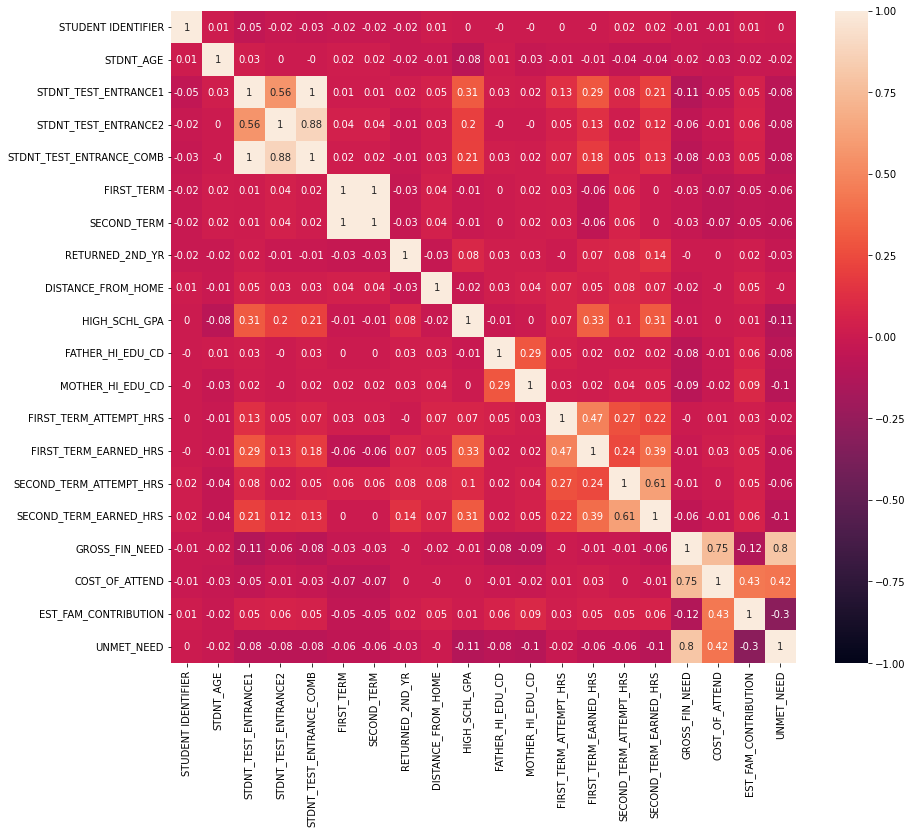

In [32]:
categoricals = [feature for feature in df01.columns if df01[feature].dtypes == 'O' and feature != 'RETURNED_2ND_YR']
categoricals
#Plotting correlation map

plt.subplots(figsize=(14,12))
sns.heatmap(df.corr().round(2), vmin=-1, vmax=1, annot = True)

In [33]:
# Greater than or equal to 50%
# 1) "COST_ATTEND" is highly correlated with "UNMET_NEED", "GROSS_FIN_NEED"
# so we will keep 'UNMET_NEED', 'GROSS_FIN_NEED'  and remove "COST_OF_ATTEND"
# 2) 'SECOND_TERM_ATTEMPT_HRS' is highly correlated with 'SECOND_TERM_EARNED_HRS'
# so we will keep only one 'SECOND_TERM_EARNED_HRS'
# 3) 'FIRST_TERM_ATTEMPT_HRS' is highly correlated with 'FIRST_TERM_EARNED_HRS'
# SO WE WILL KEEP ONLY ONE 'FIRST_TERM_EARNED_HRS'

df2 = df01.copy()
correlated_features = set()
correlation_matrix = df2.drop('RETURNED_2ND_YR', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features
# 'HIGH_SCHL_NAME' is not required and 'SECOND_TERM_ATTEMPT_HRS', 'FIRST_TERM_ATTEMPT_HRS', 'GROSS_FIN_NEED', 'UNMET_NEED'
# dropped because of high correlation
df01 = df01.drop(['HIGH_SCHL_NAME', 'SECOND_TERM_ATTEMPT_HRS', 'FIRST_TERM_ATTEMPT_HRS', 'GROSS_FIN_NEED', 'UNMET_NEED'], axis=1)

In [34]:
# Selecting the categorical features
cats = [feature for feature in df01.columns if df01[feature].dtypes == 'O' and feature != 'RETURNED_2ND_YR']
cats

['STDNT_GENDER',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_MINOR',
 'CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_NAME_3_F',
 'CORE_COURSE_GRADE_3_F',
 'CORE_COURSE_NAME_1_S',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_NAME_2_S',
 'CORE_COURSE_GRADE_2_S',
 'HOUSING_STS',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC']

In [35]:
# Selecting the categorical feature which is having more than 25 unique values
cat_with_more_unique = []
for feature in cats:
    if len(df01[feature].unique()) >=25:
        cat_with_more_unique.append(feature)

In [36]:
# prining the categorical varical which is having more than 25 unique values
# following independent features are having more than 25 unique values
# ['STDNT_MAJOR','STDNT_MINOR','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S']
cat_with_more_unique

['STDNT_MAJOR',
 'STDNT_MINOR',
 'CORE_COURSE_NAME_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_NAME_3_F',
 'CORE_COURSE_NAME_1_S',
 'CORE_COURSE_NAME_2_S']

### ONE_HOT_ENCODING for features which is having more than 25 unique values

In [37]:
top_10 = [x for x in df01.STDNT_MAJOR.value_counts().head(10).index]
for label in top_10:
    df01[label] = np.where(df01['STDNT_MAJOR']==label, 1, 0)

In [38]:
top_10 = [x for x in df01.STDNT_MINOR.value_counts().head(10).index]
for label in top_10:
    df01[label] = np.where(df01['STDNT_MINOR']==label, 1, 0)

In [39]:
top_10 = [x for x in df01.CORE_COURSE_NAME_1_F.value_counts().head(10).index]
for label in top_10:
    df01[label] = np.where(df01['CORE_COURSE_NAME_1_F']==label, 1, 0)

In [40]:
top_10 = [x for x in df01.CORE_COURSE_NAME_2_F.value_counts().head(10).index]
for label in top_10:
    df01[label] = np.where(df01['CORE_COURSE_NAME_2_F']==label, 1, 0)

In [41]:
top_10 = [x for x in df01.CORE_COURSE_NAME_3_F.value_counts().head(10).index]
for label in top_10:
    df01[label] = np.where(df01['CORE_COURSE_NAME_3_F']==label, 1, 0)

In [42]:
top_10 = [x for x in df01.CORE_COURSE_NAME_1_S.value_counts().head(10).index]
for label in top_10:
    df01[label] = np.where(df01['CORE_COURSE_NAME_1_S']==label, 1, 0)

In [43]:
top_10 = [x for x in df01.CORE_COURSE_NAME_2_S.value_counts().head(10).index]
for label in top_10:
    df01[label] = np.where(df01['CORE_COURSE_NAME_2_S']==label, 1, 0)

In [44]:
df01.drop(['STDNT_MAJOR',
 'STDNT_MINOR',
 'CORE_COURSE_NAME_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_NAME_3_F',
 'CORE_COURSE_NAME_1_S',
 'CORE_COURSE_NAME_2_S'], axis=1, inplace=True)

### One Hot Encoding

In [45]:
# SPLITTING X, Y VARIABLES
x = df01.drop(['RETURNED_2ND_YR'], axis=1)
y = df01['RETURNED_2ND_YR']

# ONE_HOT_ENCODING FOR categorical variables in x
x = pd.get_dummies(x, drop_first=True)

In [46]:
x.shape

(3400, 84)

In [47]:
y.value_counts()

0    2677
1     723
Name: RETURNED_2ND_YR, dtype: int64

#### Handling Imbalanced Dataset

In [48]:
# Handling Imbalanced DataSet
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
x_res,y_res=smk.fit_resample(x, y)

In [49]:
# Importing all the necessary ML Algorithm for Prediction
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [50]:
# Splitout Validation Datdaset
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=0)

In [51]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('RF', RandomForestClassifier()))
models.append(('Xgboost', XGBClassifier(random_state=7)))
models.append(('DT', DecisionTreeClassifier()))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.508818 (0.013616)
RF: 0.887047 (0.014276)
[10:43:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# compare Algorithms
fig = plt.figure(figsize=(15, 7))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
# Training The model using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=210, oob_score=True, n_jobs=-1, random_state=400)
clf.fit(x_train, y_train)

In [ ]:
print(clf.oob_score_)
print("Training Accuracy :",clf.score(x_train, y_train))
print("Test Accuracy :",clf.score(x_test, y_test))

y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))